<a href="https://colab.research.google.com/github/Umesh9045/DataScienceBigDataAnalysit/blob/main/DataAnalytics2.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                      # Importing the required libraries
import seaborn as sns
%matplotlib inline

In [ ]:
df=pd.read_csv('/content/Social_Adv-changed.csv')
df
df.head()
df.columns
df.shape
df.info()
df.dtypes
df.describe()    
df.isnull().sum()
df
  


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 400 entries, 0 to 399
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   User ID          400 non-null    int64
 1   Age              400 non-null    int64
 2   EstimatedSalary  400 non-null    int64
 3   Purchased        400 non-null    int64
dtypes: int64(4)
memory usage: 12.6 KB


,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


<Axes: >

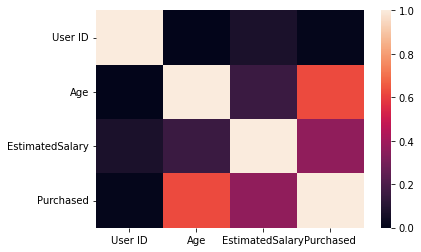

In [ ]:
df.corr()  
sns.heatmap(df.corr())  

In [ ]:
df['Purchased'].value_counts()


0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt                      # Importing the required libraries
import seaborn as sns 
%matplotlib inline
df=pd.read_csv('/content/Social_Adv-changed.csv')
df

,User ID,Age,EstimatedSalary,Purchased
0,15624510,19,19000,0
1,15810944,35,20000,0
2,15668575,26,43000,0
3,15603246,27,57000,0
4,15804002,19,76000,0
...,...,...,...,...
395,15691863,46,41000,1
396,15706071,51,23000,1
397,15654296,50,20000,1
398,15755018,36,33000,0


In [ ]:
#To check if the data is equally balanced between the target classes
df['Purchased'].value_counts()

0    257
1    143
Name: Purchased, dtype: int64

In [ ]:
#Defining features and target variable
y = df['Purchased'] #target variable we want to predict 
X = df.drop(columns = ['Purchased']) #set of required features, in this case all


In [ ]:
from sklearn.model_selection import train_test_split
#Splitting the data into train and test set 
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=42)

In [ ]:
#Predicting using Logistic Regression for Binary classification 
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train) #fitting the model 
y_pred = LR.predict(X_test) #prediction

In [ ]:
#Evaluation of Model - Confusion Matrix Plot
import itertools
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.ylabel('True label')
    plt.xlabel('Predicted label')
    plt.tight_layout()

In [ ]:
from sklearn.metrics import confusion_matrix
# Compute confusion matrix
cnf_matrix = confusion_matrix(y_test, y_pred)
np.set_printoptions(precision=2)

Confusion matrix, without normalization
[[60  3]
 [22 15]]


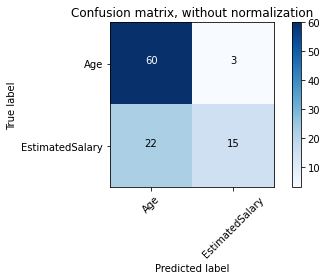

In [ ]:

# Plot non-normalized confusion matrix
plt.figure()
plot_confusion_matrix(cnf_matrix, classes=['Age','EstimatedSalary'],
                      title='Confusion matrix, without normalization')


In [ ]:
#extracting true_positives, false_positives, true_negatives, false_negatives
tn, fp, fn, tp = confusion_matrix(y_test, y_pred).ravel()
print("True Negatives: ",tn)
print("False Positives: ",fp)
print("False Negatives: ",fn)
print("True Positives: ",tp)

True Negatives:  60
False Positives:  3
False Negatives:  22
True Positives:  15


In [ ]:
#Accuracy
Accuracy = (tn+tp)*100/(tp+tn+fp+fn) 
print("Accuracy {:0.2f}%:", format(Accuracy))

Accuracy {:0.2f}%: 75.0


In [ ]:
#Precision 
Precision = tp/(tp+fp) 
print("Precision {:0.2f}",format(Precision))

Precision {:0.2f} 0.8333333333333334


In [ ]:
#Recall 
Recall = tp/(tp+fn) 
print("Recall {:0.2f}",format(Recall))

Recall {:0.2f} 0.40540540540540543


In [ ]:
#F1 Score
f1 = (2*Precision*Recall)/(Precision + Recall)
print("F1 Score {:0.2f}",format(f1))

F1 Score {:0.2f} 0.5454545454545455


In [ ]:
#F-beta score calculation
def fbeta(precision, recall, beta):
    return ((1+pow(beta,2))*precision*recall)/(pow(beta,2)*precision + recall)
            
f2 = fbeta(Precision, Recall, 2)
f0_5 = fbeta(Precision, Recall, 0.5)

print("F2 {:0.2f}",format(f2))
print("\nF0.5 {:0.2f}",format(f0_5))

F2 {:0.2f} 0.4518072289156627

F0.5 {:0.2f} 0.6880733944954129


In [ ]:
#Specificity 
Specificity = tn/(tn+fp)
print("Specificity {:0.2f}",format(Specificity))

Specificity {:0.2f} 0.9523809523809523
